In [227]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
import cmath
from scipy.interpolate import interp1d
from matplotlib.patches import Circle
import astropy.io.fits as fits
from matplotlib import ticker
from hcipy import * # bad Ramya!

In [228]:
file_dir='D:\\Work\\OneDrive\\University_Arizona\\Polarization_aberrations_ESC\\Jones_pupils_2m_upstream\\'
#file_dir='D:\\Work\\OneDrive\\University_Arizona\\Polarization_aberrations_SCOOB\\Jones_pupils_2\\'

In [234]:
def jones_plot(JXX,JXY,JYX,JYY):
    
    X, Y = np.round(np.mgrid[(-1):(1):512j, (-1):(1):512j],3)
    positions = np.vstack([X.ravel(), Y.ravel()])
    pos=np.transpose(positions)
    px=pos[:,0]
    py=pos[:,1]
    Exx_array=JXX
    Exy_array=JXY
    Eyx_array=JYX
    Eyy_array=JYY
    
    fig1 = plt.figure(figsize=(16, 6))

    ax1 = fig1.add_subplot(241)
    im1=ax1.imshow(np.abs(Exx_array),cmap='magma',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_ylabel('py', fontsize=14)
    ax1.set_title('$Axx$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(242)
    im1=ax1.imshow(np.abs(Exy_array),cmap='magma',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_title('$Axy$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(243)
    im1=ax1.imshow(np.angle(Exx_array),cmap='coolwarm',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_title(r'$\phi xx$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(244)
    im1=ax1.imshow(np.angle(Exy_array),cmap='coolwarm',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_title(r'$\phi xy$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(245)
    im1=ax1.imshow(np.abs(Eyx_array),cmap='magma',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_ylabel('py', fontsize=14)
    ax1.set_xlabel('px', fontsize=14)
    ax1.set_title('$Ayx$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(246)
    im1=ax1.imshow(np.abs(Eyy_array),cmap='magma',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_xlabel('px', fontsize=14)
    ax1.set_title('$Ayy$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(247)
    im1=ax1.imshow(np.angle(Eyx_array),cmap='coolwarm',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_xlabel('px', fontsize=14)
    ax1.set_title(r'$\phi yx$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)

    ax1 = fig1.add_subplot(248)
    im1=ax1.imshow(np.angle(Eyy_array),cmap='coolwarm',interpolation='nearest',extent=[np.min(px),np.max(px),np.min(py),np.max(py)])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
    ax1.set_xlabel('px', fontsize=14)
    ax1.set_title(r'$\phi yy$',fontdict={'fontsize': 20, 'fontweight': 'medium'})
    cb = fig1.colorbar(im1,orientation='vertical',shrink=0.9)
    cb.ax.tick_params(labelsize=14)
    fig1.subplots_adjust(hspace=0.1, wspace=0.45, top=0.95, right=0.95)
    return()

In [235]:
jxx=fits.getdata(file_dir+'Exxr_R.fits')+1j*fits.getdata(file_dir+'Exxi_R.fits')
jxy=fits.getdata(file_dir+'Exyr_R.fits')+1j*fits.getdata(file_dir+'Exyi_R.fits')
jyx=fits.getdata(file_dir+'Eyxr_R.fits')+1j*fits.getdata(file_dir+'Eyxi_R.fits')
jyy=fits.getdata(file_dir+'Eyyr_R.fits')+1j*fits.getdata(file_dir+'Eyyi_R.fits')

In [236]:
# set up hcipy grids
pupil_grid = make_pupil_grid(jxx.shape[0]) # jxx.shape[0] is the side dimension of a square array
focal_grid = make_focal_grid(12,15)
aperture = make_circular_aperture(pupil_grid)
prop = FraunhoferPropagator(pupil_grid,focal_grid)

In [237]:
jxxf=jxx.flatten()
jxyf=jxy.flatten()
jyxf=jyx.flatten()
jyyf=jyy.flatten()

In [238]:
#getting rid of the phase wrapping 
d_phi=np.angle(jxxf*np.conj(jyyf))
ph_dm=np.angle(jxxf*np.exp(-1j*d_phi))

In [239]:
j_abr_list=[]
for i in range(len(ph_dm)):
    dm_jones=[[np.exp(-1j*ph_dm[i]),0],
              [0,np.exp(-1j*ph_dm[i])]]
    jones_mat=[[jxxf[i],jxyf[i]],
               [jyxf[i],jyyf[i]]]
    j_abr=np.matmul(jones_mat,dm_jones)
    j_abr_list.append(j_abr)

In [240]:
jxxn_list=[];jxyn_list=[];jyxn_list=[];jyyn_list=[];
for i in range(len(ph_dm)):
    jxxn=j_abr_list[i][0][0]
    jxyn=j_abr_list[i][0][1]
    jyxn=j_abr_list[i][1][0]
    jyyn=j_abr_list[i][1][1]
    
    jxxn_list.append(jxxn)
    jxyn_list.append(jxyn)
    jyxn_list.append(jyxn)
    jyyn_list.append(jyyn)

nx=ny=512;
jxxn_array=np.reshape(jxxn_list,(nx,ny))
jxyn_array=np.reshape(jxyn_list,(nx,ny))
jyxn_array=np.reshape(jyxn_list,(nx,ny))
jyyn_array=np.reshape(jyyn_list,(nx,ny))

()

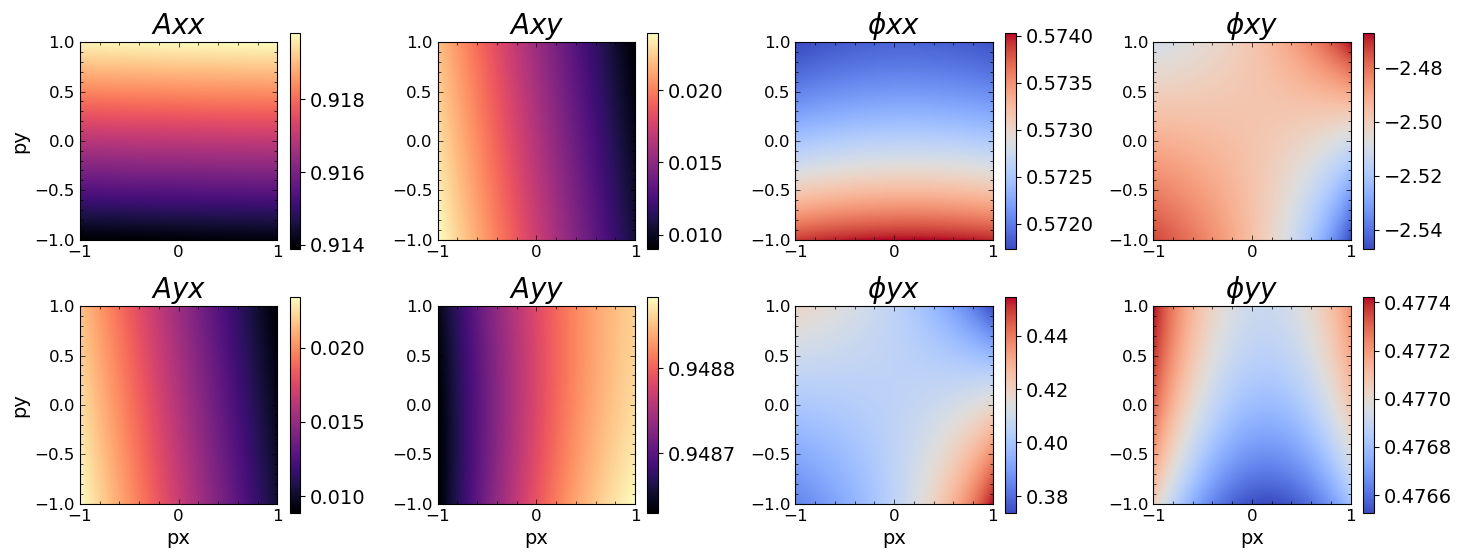

In [241]:
jones_plot(jxx,jxy,jyx,jyy)

()

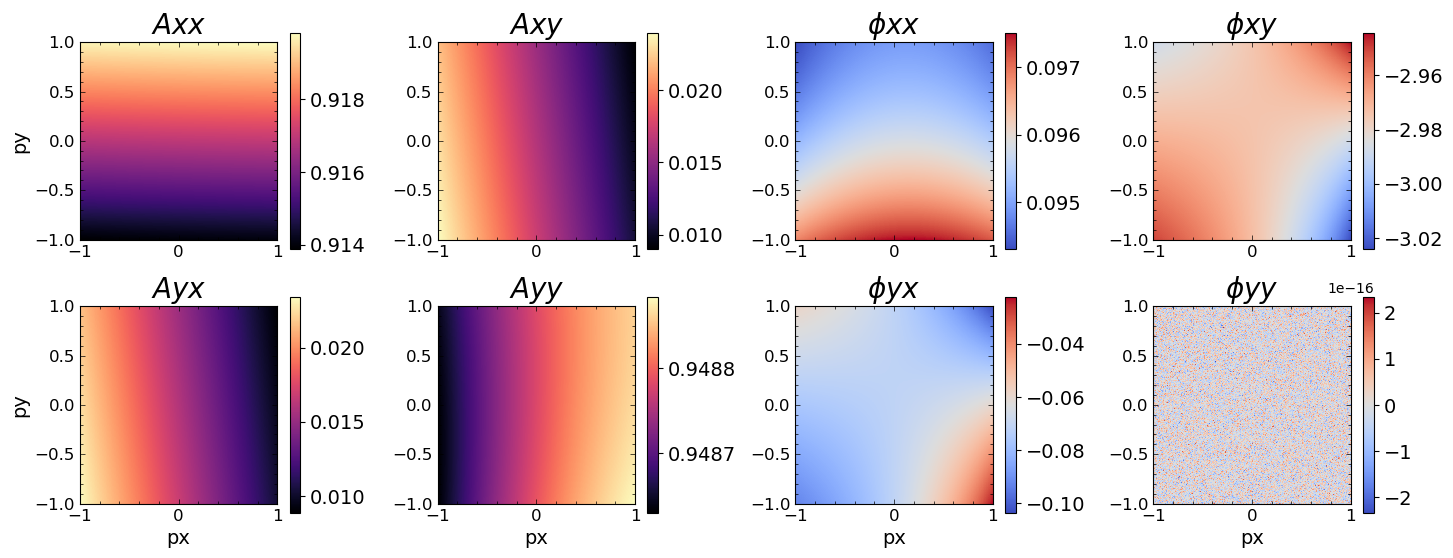

In [242]:
jones_plot(jxxn_array,jxyn_array,jyxn_array,jyyn_array)

In [243]:
jdata=[jxxn_array,jxyn_array,jyxn_array,jyyn_array]

In [254]:
tilt=0
jdata = [j.ravel()*np.exp(1j*2*np.pi*pupil_grid.x*tilt) for j in jdata]
wf = Wavefront(Field([[jdata[0],jdata[1]],[jdata[2],jdata[3]]],pupil_grid),input_stokes_vector=[1,0,0,0])
aperture = evaluate_supersampled(make_circular_aperture(1),pupil_grid,4)
lyot = evaluate_supersampled(make_circular_aperture(0.95),pupil_grid,4)

In [265]:
# setup and propagate vvc
lyot_stop = Apodizer(lyot)
aperture_stop = Apodizer(aperture)
coro = VectorVortexCoronagraph(6,lyot_stop=lyot)

In [266]:
wf_coro = coro.forward(wf)
wf_lyot = lyot_stop(wf_coro)

In [267]:
iwa = 2
owa = 10

dark_zone = circular_aperture(2 * owa)(focal_grid)
dark_zone -= circular_aperture(2 * iwa)(focal_grid)
#dark_zone *= focal_grid.x > offset
dark_zone = dark_zone.astype(bool)

C:\Users\Ramya\AppData\Local\Temp\ipykernel_3344\3292750203.py:4: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  dark_zone = circular_aperture(2 * owa)(focal_grid)
C:\Users\Ramya\AppData\Local\Temp\ipykernel_3344\3292750203.py:5: DeprecationWarning: circular_aperture is deprecated. Its new name is make_circular_aperture.
  dark_zone -= circular_aperture(2 * iwa)(focal_grid)


0.8707198796493127


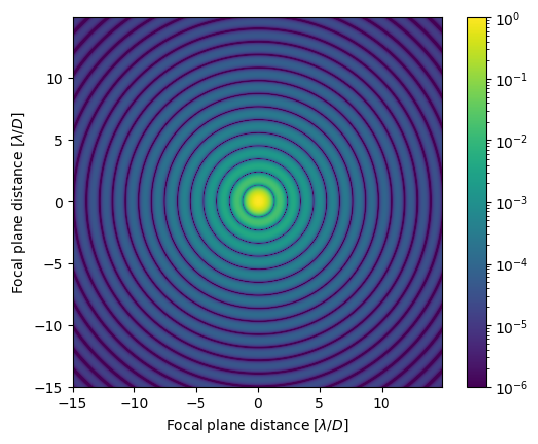

In [268]:
#wf_pf=Wavefront(aperture)
#wf_pf = Wavefront(aperture*Field([[jdata[0],jdata[1]],[jdata[2],jdata[3]]],pupil_grid),input_stokes_vector=[1,0,0,0])

wf_pf = Wavefront(Field(np.sqrt(jdata[0]**2 + jdata[3]**2), pupil_grid))
wf_pf_lyot_stop=lyot_stop.forward(wf_pf)
img_pf=prop.forward(wf_pf_lyot_stop)
imshow_field(img_pf.intensity/img_pf.intensity.max(), norm=LogNorm(vmin=1e-6))
plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')

print(img_pf.intensity.max())

4.46569110424043e-12


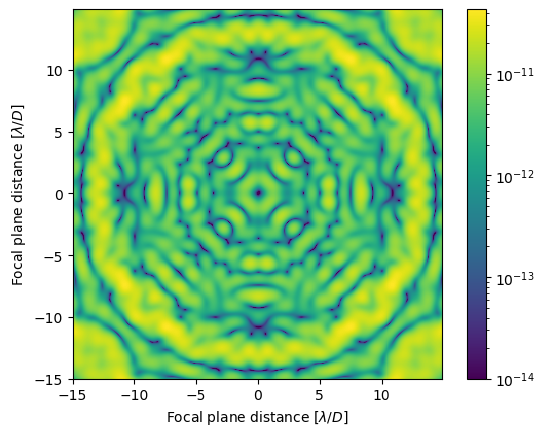

In [272]:
wf_pf=Wavefront(aperture)
wf_pf_lyot_stop=lyot_stop.forward(coro(wf_pf))
img_cor=prop.forward(wf_pf_lyot_stop)
imshow_field(img_cor.intensity/img_pf.intensity.max(), norm=LogNorm(vmin=1e-14))
plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')

c = img_cor.intensity/img_pf.intensity.max()
print(np.mean(c[dark_zone]))

In [250]:
img = prop(wf_lyot)
shape = 360
cmplx_field = img.electric_field.reshape([shape,shape,2,2])

3.577071755436394e-05


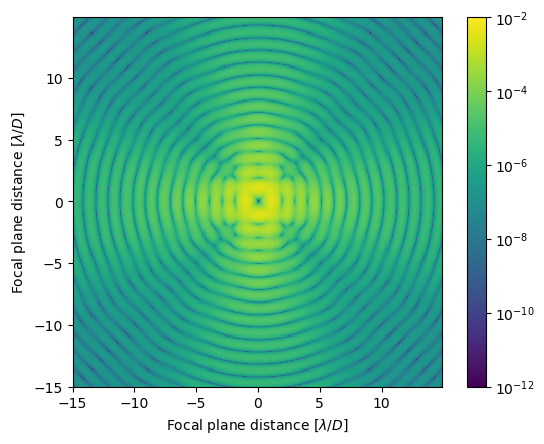

In [251]:
# aberrated WF (no QWP/LP)

imshow_field(img.intensity/img_pf.intensity.max(),norm=LogNorm(vmin=1e-12,vmax=1e-2))#vmax=0.1,vmin=-6)
plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')

c = img.intensity/img_pf.intensity.max()
print(np.mean(c[dark_zone]))

In [252]:
# using the QWP and polarizer
wf = Wavefront(aperture*Field([[jdata[0],jdata[1]],[jdata[2],jdata[3]]],pupil_grid),input_stokes_vector=[1,0,0,0])
lp=LinearPolarizer(0)
qwp1 = QuarterWavePlate(np.pi/4)
wf_lp1 = lp.forward(wf)
wf_qwp1=qwp1.forward(wf_lp1)
wf_coro = coro.forward(wf_qwp1)
wf_lyot = lyot_stop(wf_coro)
wf_qwp2= qwp1.forward(wf_lyot)
wf_lp2=lp.forward(wf_qwp2)
img = prop(wf_lp2)

2.2218864087672465e-09


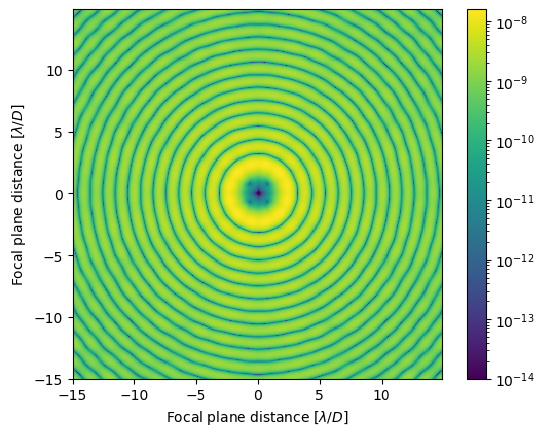

In [253]:
imshow_field(img.intensity/img_pf.intensity.max(),norm=LogNorm(vmin=1e-14))
plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')

c = img.intensity/img_pf.intensity.max()
print(np.mean(c[dark_zone])) # !!!!! need a factor of 2 here to account for input QWP/LP

In [ ]:
# higher sampling below

In [133]:
# set up hcipy grids
pupil_grid = make_pupil_grid(1024) # jxx.shape[0] is the side dimension of a square array
focal_grid = make_focal_grid(12,15)
aperture = make_circular_aperture(pupil_grid)
prop = FraunhoferPropagator(pupil_grid,focal_grid)
aperture = evaluate_supersampled(make_circular_aperture(1),pupil_grid,1)
lyot = evaluate_supersampled(make_circular_aperture(0.8),pupil_grid,4)
lyot_stop = Apodizer(lyot)
aperture_stop = Apodizer(aperture)
coro = VectorVortexCoronagraph(6,lyot_stop=lyot)

Text(0, 0.5, 'Focal plane distance [$\\lambda/D$]')

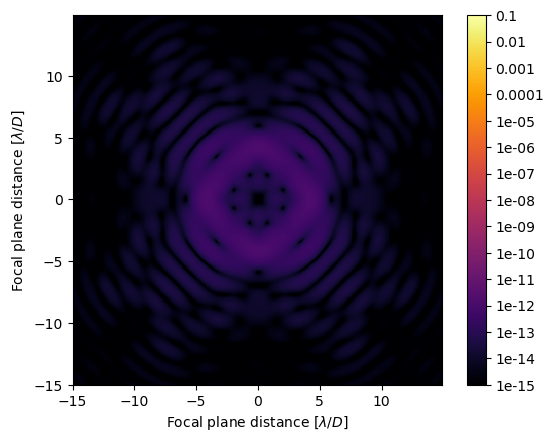

In [134]:
wf_pf=Wavefront(aperture)
wf_pf_lyot_stop=lyot_stop.forward(coro(wf_pf))
img_cor=prop.forward(wf_pf_lyot_stop)
imshow_psf(img_cor.power,vmin=1e-15)
#plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')